# Módulo 5.x: Aplicações e Contextualização de ULs (Unsupervised Learning)

## 1. Para que isso serve no contexto de dados?

Quando não existe uma resposta rotulada para cada observação, o valor para o negócio não está em prever um rótulo, mas em extrair estrutura, padrões e sinais latentes dos dados.

Nesse contexto, a IA não prevê uma resposta direta. Ela organiza o desconhecido, identifica agrupamentos naturais, anomalias e relações ocultas, apoiando decisões estratégicas.

O valor gerado se sustenta em três pilares principais:

### 1.1. Agrupamento (Clustering): "Quem se parece com quem?"

**Aplicações:** Segmentação de clientes, sistemas de recomendação, categorização de produtos.

Pense no Clustering como organizar uma festa onde você não conhece ninguém. Naturalmente, as pessoas vão se agrupar por afinidade: o pessoal do rock num canto, os fãs de animes no outro, os executivos perto do bar. O algoritmo faz exatamente isso com seus dados: ele cria grupos **baseados em similaridade**.

**Isso te ajuda a responder perguntas como:**
- "Quais são os meus perfis de clientes?"
- "Quais pacientes têm sintomas clínicos parecidos?"

**O que define um grupo?**

Matematicamente, é a distância. Pontos que estão "perto" um do outro ficam no mesmo grupo. E, por isso, a escala é vital. Se você misturar "Idade" (0 a 100) com "Salário" (0 a 50.000) sem padronizar, o algoritmo vai achar que o salário é 500x mais importante só porque o número é maior.  

**Ferramentas mais comuns (e quando usar):**
- **K-Means**: Imagine que você joga 3 bandeiras no chão e cada dado corre para a bandeira mais próxima. É rápido, mas assume que os grupos são esféricos (em torno de um centro).
- **DBSCAN**: Pense nele como uma infecção ou um formigueiro. Ele agrupa por densidade. Se os dados formam uma "lua" ou uma "cobra", ele consegue seguir esse formato. Além disso, ele sabe ignorar ruídos (pontos isolados).
- **Hierárquico**: Constrói uma árvore genealógica dos dados. Ótimo quando você quer entender subgrupos dentro de grupos.

**Checklist de antes de aplicar clustering:**
1) Remova IDs ou nomes (eles não ajudam a agrupar comportamento).
2) Padronize: Use StandardScaler. Nunca rode K-Means com escalas diferentes.
3) Escolha boas features: O algoritmo só é tão bom quanto os dados que você dá a ele.

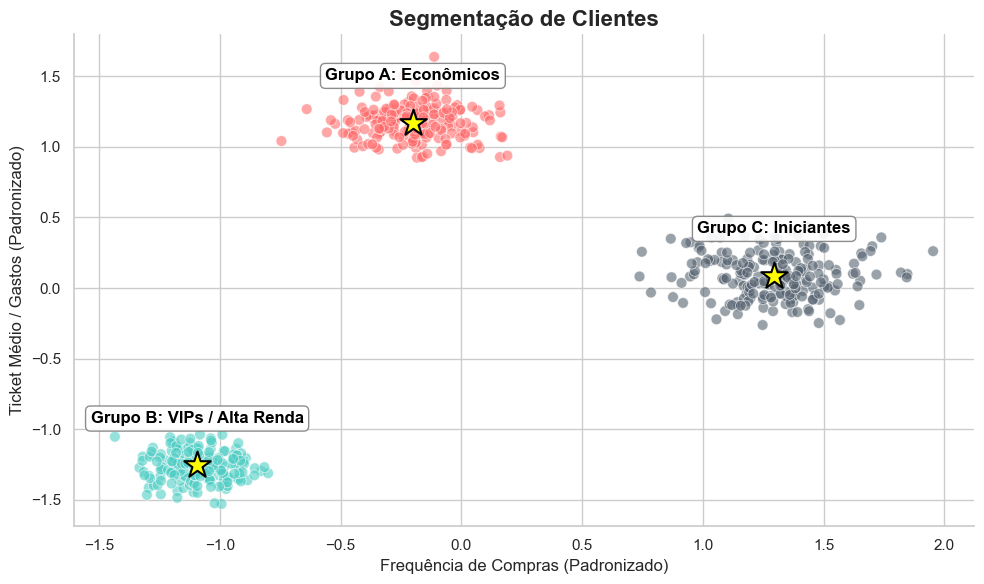

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Configuração de estilo (para ficar mais bonito)
sns.set_theme(style="whitegrid")

# 1) Gerar dados simulando "clientes"
# Vamos assumir que Feature 1 = Frequência de Compras e Feature 2 = Gasto Total
X, y_true = make_blobs(n_samples=600, centers=3, cluster_std=[0.8, 1.0, 0.6], random_state=42)

# 2) Padronizar (Crucial para o K-Means não dar peso errado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Instanciar e treinar o K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# 4) Obter as coordenadas dos centróides
centroids = kmeans.cluster_centers_

# Definir tamanho e criar a figura
plt.figure(figsize=(10, 6))

# Definir cores personalizadas para os grupos
colors = ["#FF6B6B", "#4ECDC4", "#556270"]

# Plotar os pontos dos clientes
sns.scatterplot(
    x=X_scaled[:, 0], 
    y=X_scaled[:, 1], 
    hue=labels, 
    palette=colors, 
    s=60,           # Tamanho dos pontos
    alpha=0.6,      # Transparência para ver sobreposições
    edgecolor="w",  # Borda branca nos pontos para destaque
    legend=False    # Removemos a legenda padrão para criar uma melhor
)

# Plotar os Centróides
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    s=400,          # Centróide bem grande
    c='yellow',     # Cor amarela para chamar atenção
    marker='*',     # Formato de estrela
    edgecolor='black', 
    linewidth=1.5,
    label='Centróides (Padrão do Grupo)'
)

# Adicionar rótulos de negócio hipotéticos perto dos centróides
business_labels = ["Grupo A: Econômicos", "Grupo B: VIPs / Alta Renda", "Grupo C: Iniciantes"]

for i, coords in enumerate(centroids):
    plt.text(
        coords[0], coords[1] + 0.3, # Posiciona um pouco acima do centróide
        business_labels[i], 
        horizontalalignment='center',
        size=12, 
        weight='bold',
        color='black',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9) # Caixinha de fundo
    )

# Títulos e Eixos com contexto
plt.title('Segmentação de Clientes', fontsize=16, weight='bold')
plt.xlabel('Frequência de Compras (Padronizado)', fontsize=12)
plt.ylabel('Ticket Médio / Gastos (Padronizado)', fontsize=12)

# Remover as bordas desnecessárias do gráfico (topo e direita)
sns.despine()

plt.tight_layout()
plt.show()

### 1.2. Redução de Dimensionalidade: "Resumindo a informação"

**Aplicação:** Visualização de dados complexos, compressão de imagens, acelerar o treinamento de modelos.

Imagine tentar descrever uma pessoa usando 300 características diferentes (altura, peso, cor do olho, tamanho do pé, marca favorita de cereal, etc.). É informação demais e muita coisa é redundante (se você sabe o tamanho do sapato, provavelmente já tem uma dica da altura).

Reduzir a dimensionalidade é como tirar uma foto de uma escultura 3D. A foto é 2D (menos complexa), mas se você tirar do ângulo certo, ela captura a essência da escultura inteira.

**PCA em 3 tópicos:**
- O PCA procura o "melhor ângulo" para tirar essa foto.
- Ele cria novas variáveis lineares que são misturas das originais.
- O objetivo é manter a variância (a informação que diferencia um dado do outro) e descartar a redundância.

**Quando PCA funciona bem:**
- Você tem muitas colunas (maldição da dimensionalidade).
- Suas variáveis têm alta correlação (ex: gasto total e gasto médio).
- Você quer plotar um gráfico 2D de um dataset que tem 50 colunas.

**Quando tomar cuidado com PCA:**
- O PCA é um método linear. Se seus dados formam um espiral complexo, ele pode falhar (aí usamos t-SNE ou UMAP).
- Ele torna os dados abstratos: você deixa de ter a coluna "Idade" e passa a ter o "Componente 1", que é uma mistura matemática de idade, renda e outros. Perde-se a interpretabilidade direta em troca de performance.

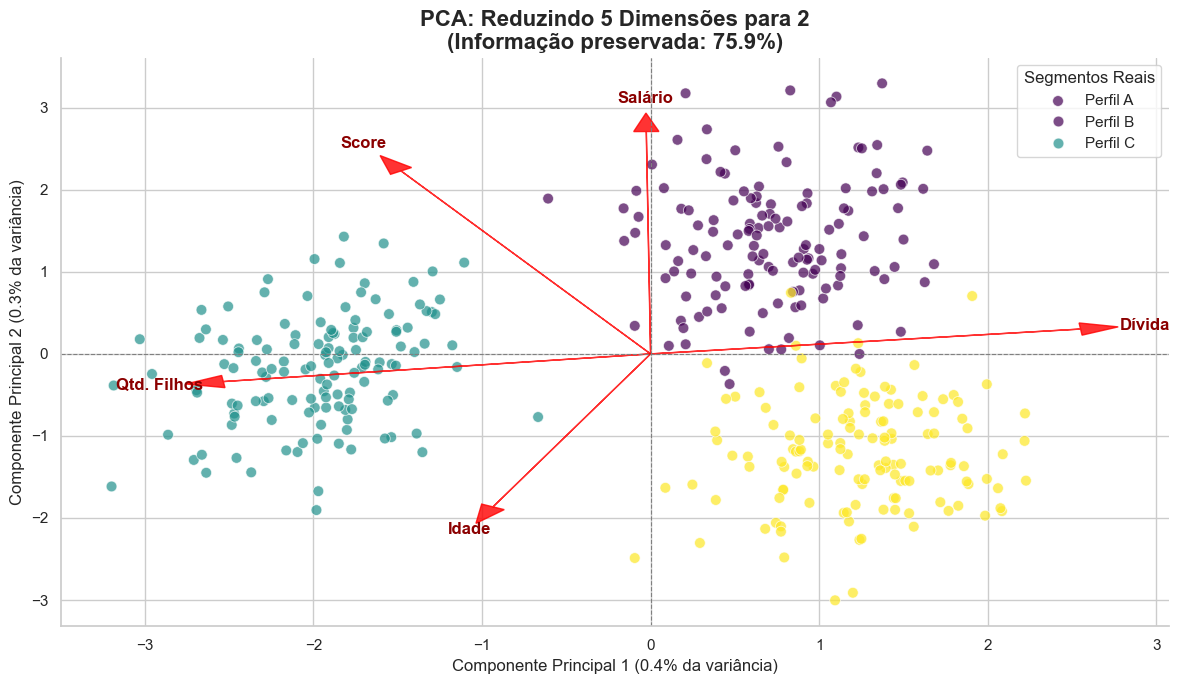

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Configuração estética
sns.set_theme(style="whitegrid")

# 1) Gerar dados (Simulando 5 colunas: Salário, Dívida, Idade, Score, Filhos)
# Criamos 3 grupos naturais para ver o PCA separar
n_features = 5
feature_names = ['Salário', 'Dívida', 'Idade', 'Score', 'Qtd. Filhos']
X, y_grupos = make_blobs(n_samples=400, n_features=n_features, centers=3, random_state=42, cluster_std=2.5)

# 2) Padronizar (Obrigatório no PCA, tal como no KMeans)
X_scaled = StandardScaler().fit_transform(X)

# 3) Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Calcular quanto da informação foi mantida
var_explicada = pca.explained_variance_ratio_
total_var = sum(var_explicada) * 100

plt.figure(figsize=(12, 7))

# A) O Scatter Plot (Os dados comprimidos)
# Usamos 'y_grupos' apenas para colorir e provar que o PCA manteve a estrutura
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=y_grupos, 
    palette='viridis', 
    s=60, 
    alpha=0.7, 
    edgecolor='w',
    legend='full'
)

# B) O Biplot (Desenhando as variáveis originais como vetores)
# Isso mostra como cada variável original contribui para os novos eixos
components = pca.components_
# Fator de escala para as setas ficarem visíveis no gráfico
scale_arrow = 4 

for i, feature in enumerate(feature_names):
    # Pegamos a direção da variável nos eixos 1 e 2
    x_arrow = components[0, i] * scale_arrow
    y_arrow = components[1, i] * scale_arrow
    
    # Desenhar a seta
    plt.arrow(0, 0, x_arrow, y_arrow, color='red', alpha=0.8, head_width=0.15)
    
    # Escrever o nome da variável na ponta da seta
    plt.text(x_arrow * 1.15, y_arrow * 1.15, feature, color='darkred', ha='center', va='center', weight='bold')

# Decoração (beleza é tudo na visualização)
plt.title(f'PCA: Reduzindo 5 Dimensões para 2\n(Informação preservada: {total_var:.1f}%)', fontsize=16, weight='bold')
plt.xlabel(f'Componente Principal 1 ({var_explicada[0]:.1f}% da variância)', fontsize=12)
plt.ylabel(f'Componente Principal 2 ({var_explicada[1]:.1f}% da variância)', fontsize=12)

# Adicionar linhas de centro para referência
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')

# Ajustar legenda (fingindo que são segmentos de clientes)
plt.legend(title='Segmentos Reais', labels=['Perfil A', 'Perfil B', 'Perfil C'])

sns.despine()
plt.tight_layout()
plt.show()

### 1.3. Detecção de Anomalias (Outliers): "O que é estranho aqui?"

**Aplicações:** Detecção de fraude em cartão de crédito, falhas em motores, invasão de redes.

Aqui o jogo muda. Na maioria dos problemas de ML, queremos encontrar o padrão da maioria. Aqui, queremos encontrar o que foge do padrão. O cenário é sempre desbalanceado: você tem 99,9% de transações normais e 0,1% de fraude. Tentar classificar isso como um problema supervisionado comum é difícil porque a IA quase nunca vê a fraude.

A estratégia então é: Aprender o que é o "Normal". Tudo o que for muito diferente do normal, acendemos um alerta.

**Algoritmos principais:**
- **Isolation Forest**: Imagine que você quer isolar um ponto cortando o espaço com linhas aleatórias. Se o ponto for "normal", ele está no meio da multidão e demora muitos cortes para ficar sozinho. Se o ponto for uma anomalia (está longe de todos), com um ou dois cortes você já isola ele. A premissa é que as anomalias são fáceis de isolar.
- **One-Class SVM**: Ele tenta desenhar um círculo (ou hiperplano) bem apertado ao redor dos seus dados normais. Quem cair fora do círculo é considerado anomalia.
- **Local Outlier Factor (LOF)**: Ele compara a densidade. Se um ponto está numa região deserta, mas todos os vizinhos dele vivem em regiões superpovoadas, ele é suspeito.

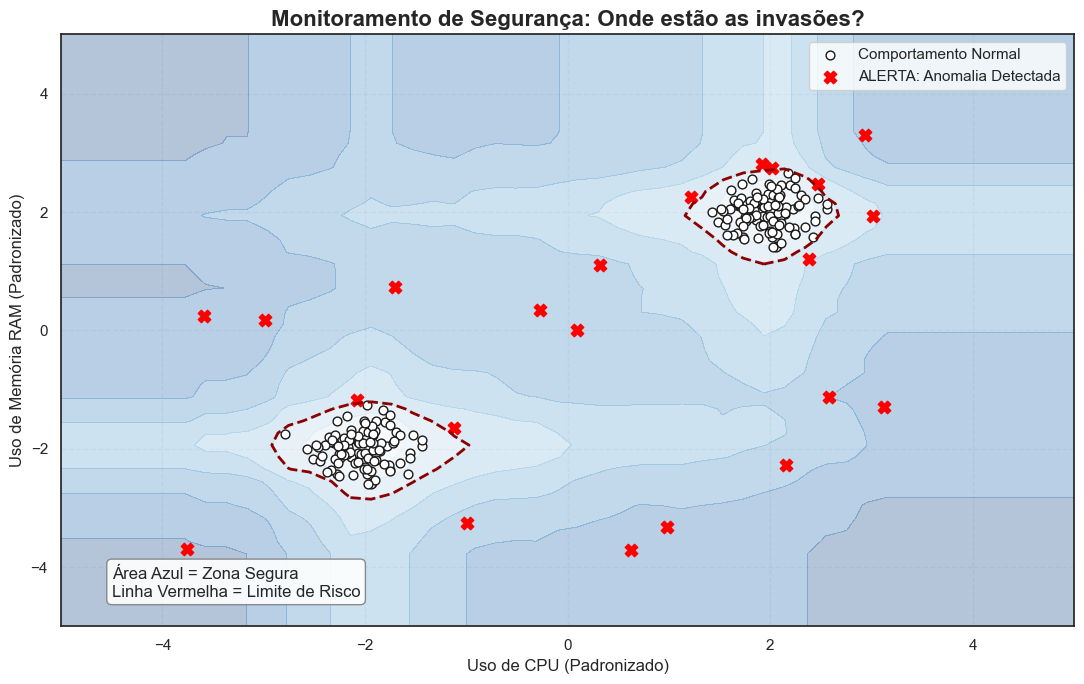

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Configuração estética
sns.set_theme(style="white") # Fundo branco para destacar as áreas coloridas

# 1) Gerar dados (Cenário: Monitoramento de Servidores)
# Imagine que temos dois comportamentos normais:
# - Servidor Ocioso (Baixo uso)
# - Servidor em Processamento (Uso Médio/Alto)
rng = np.random.RandomState(42)

# Dados normais (concentrados em dois locais)
X_normal = 0.3 * rng.randn(100, 2)
X_train = np.r_[X_normal + 2, X_normal - 2] # Dois clusters de normalidade

# Adicionar Outliers (Ataques, Falhas de Hardware, Picos de uso)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_train, X_outliers]

# 2) Treinar o Modelo
# contamination=0.1 significa que estimamos que 10% dos dados sejam problemas
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X)

# Criar uma grade (grid) para cobrir todo o gráfico e ver o que o modelo pensa de cada pixel
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(11, 7))

# A) Plotar as "Curvas de Nível" (O Mapa de Segurança)
# Áreas mais escuras de azul são "Mais Normais". Áreas brancas/claras são "Perigo".
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.3)

# Desenhar a linha vermelha que separa o Normal do Anômalo
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred', linestyles='--')

# B) Plotar os Pontos Reais
y_pred = clf.predict(X)

# Separar para plotar com estilos diferentes
mask_normal = y_pred == 1
mask_anomalia = y_pred == -1

# Plotar Normais (Bolinhas tranquilas)
plt.scatter(X[mask_normal, 0], X[mask_normal, 1], 
            c='white', edgecolors='k', s=40, label='Comportamento Normal')

# Plotar Anomalias (Xis Vermelho de Alerta)
plt.scatter(X[mask_anomalia, 0], X[mask_anomalia, 1], 
            c='red', marker='X', s=80, label='ALERTA: Anomalia Detectada')

# Decoração e Contexto
plt.title('Monitoramento de Segurança: Onde estão as invasões?', fontsize=16, weight='bold')
plt.xlabel('Uso de CPU (Padronizado)', fontsize=12)
plt.ylabel('Uso de Memória RAM (Padronizado)', fontsize=12)

# Nota de explicação dos limites de segurança
plt.text(-4.5, -4.5, "Área Azul = Zona Segura\nLinha Vermelha = Limite de Risco", 
         bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.9))

plt.legend(loc='upper right')
plt.grid(True, alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()